<a href="https://colab.research.google.com/github/dhitsaanggara/TugasPSD_FilterDanJendela/blob/main/TugasPSD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filter
Filter adalah alat yang digunakan untuk memanipulasi sinyal dengan cara tertentu. Filter dapat digunakan untuk berbagai tujuan, termasuk:

Penyaringan: Filter dapat digunakan untuk menghilangkan komponen frekuensi tertentu dari sinyal. Misalnya, filter pita-pas (bandpass) memungkinkan hanya frekuensi tertentu untuk melewati filter, sedangkan yang lainnya diblokir.
Penguatan: Beberapa filter dapat digunakan untuk meningkatkan amplitudo komponen frekuensi tertentu dalam sinyal.
Pemulihan Sinyal: Filter dapat digunakan untuk memulihkan sinyal yang terdistorsi atau terganggu.
Terdapat berbagai jenis filter, seperti filter FIR (Finite Impulse Response) dan filter IIR (Infinite Impulse Response), yang memiliki karakteristik dan penggunaan yang berbeda.

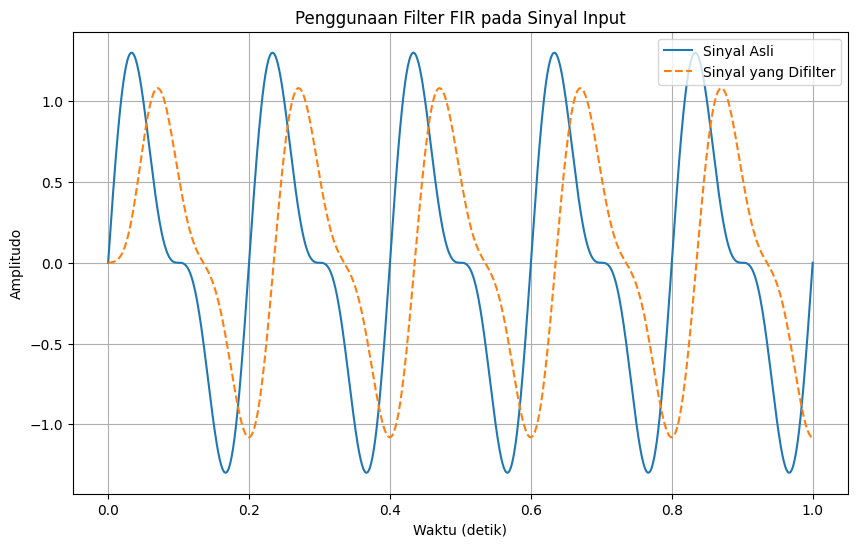

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Fungsi untuk menghasilkan sinyal input
def generate_input_signal(frequency, sampling_rate, duration):
    num_samples = int(duration * sampling_rate)
    time = np.linspace(0, duration, num_samples)
    signal = np.sin(2 * np.pi * frequency * time) + 0.5 * np.sin(2 * np.pi * 2 * frequency * time)
    return time, signal

# Parameter sinyal
frequency = 5 # frekuensi sinyal (Hz)
sampling_rate = 1000 # frekuensi sampling (Hz)
duration = 1 # durasi sinyal (detik)

# Membuat sinyal input
time, input_signal = generate_input_signal(frequency, sampling_rate, duration)

# Desain filter FIR
num_taps = 71 # jumlah koefisien filter
cutoff_frequency = 3 # frekuensi cutoff filter (Hz)
nyquist_rate = 0.5 * sampling_rate
normalized_cutoff_frequency = cutoff_frequency / nyquist_rate
fir_coefficients = firwin(num_taps, normalized_cutoff_frequency)

# Menggunakan filter FIR pada sinyal input
filtered_signal = lfilter(fir_coefficients, 1.0, input_signal)

# Plot sinyal input dan sinyal yang difilter
plt.figure(figsize=(10, 6))
plt.plot(time, input_signal, label='Sinyal Asli')
plt.plot(time, filtered_signal, label='Sinyal yang Difilter', linestyle='--')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.title('Penggunaan Filter FIR pada Sinyal Input')
plt.legend()
plt.grid(True)
plt.show()


# Jendela
Jendela adalah fungsi matematis yang digunakan untuk membatasi sinyal dalam interval waktu tertentu. Penggunaan jendela pada sinyal sering kali terkait dengan analisis dan pemrosesan sinyal dalam domain frekuensi. Beberapa tujuan utama penggunaan jendela adalah:

Mengurangi Efek Sisi: Ketika Anda melakukan transformasi Fourier pada sinyal yang terbatas dalam interval waktu tertentu (misalnya, menggunakan transformasi Fourier diskrit), sinyal tersebut sebenarnya dianggap berulang. Penggunaan jendela dapat membantu mengurangi efek sisi yang terjadi akibat dari sinyal yang terbatas ini.
Kontrol Resolusi Frekuensi: Memilih jendela yang tepat dapat memengaruhi resolusi frekuensi dari transformasi Fourier. Beberapa jendela memberikan resolusi frekuensi yang lebih baik untuk komponen frekuensi rendah, sementara yang lainnya lebih baik untuk komponen frekuensi tinggi.
Mengurangi Sinyal Derau: Jendela juga dapat digunakan untuk mengurangi efek derau dalam sinyal dengan memberikan bobot yang lebih rendah pada bagian ujung-ujung sinyal.

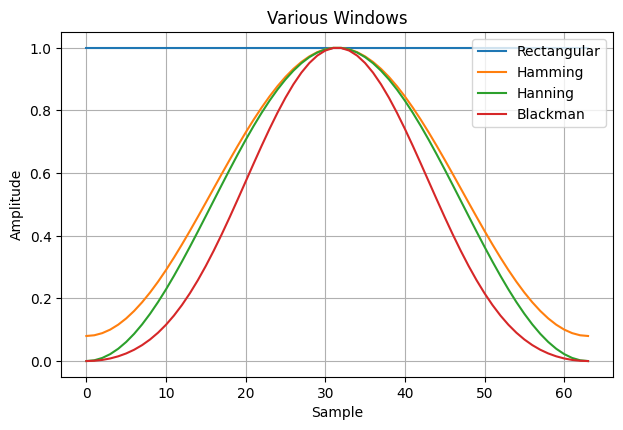

In [52]:
# Macam Macam Jenis Jendela
import numpy as np
import matplotlib.pyplot as plt

# Panjang jendela
L = 64

# Jendela Rechteck (Boxcar)
window_boxcar = np.ones(L)

# Jendela Hamming
window_hamming = np.hamming(L)

# Jendela Hanning
window_hanning = np.hanning(L)

# Jendela Blackman
window_blackman = np.blackman(L)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(window_boxcar, label='Rectangular')
plt.plot(window_hamming, label='Hamming')
plt.plot(window_hanning, label='Hanning')
plt.plot(window_blackman, label='Blackman')
plt.title('Various Windows')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()
